#Description: Lab 6_Visualizing Numbers
###(1)In this exercise, you will have the opportunity to use a dataset about avocado price modified from Kaggle: https://www.kaggle.com/datasets/neuromusic/avocado-prices. The columns are:


*   Date - The date of the observation
*   AveragePrice - the average price of a single avocado
*   type - conventional or organic
*   year - the year
*   city - the city or region of the observation
*   state - the state of the observation
*   region - the region of the observation
*   Total Volume - Total number of avocados sold
*   4046 - Total number of avocados with PLU 4046 sold
*   4225 - Total number of avocados with PLU 4225 sold
*   4770 - Total number of avocados with PLU 4770 sold
*   Small Bags: the number of small bags of avocados sold
*   Large Bags: the number of large bags of acocados sold
*   XLarge Bags: the number of extra large bags of avocado sold
*   Total Bags: the total bags of acovados sold

###(2) You are asked to create **five** visualizations using the avocado dataset 
###(3) One or more examples are provided for each type of visualizations


# Step 0: Import the data

In [1]:
#0 we import the main packages we will be using: pandas
import pandas as pd
import seaborn as sns
import numpy as np
import io
import matplotlib.pyplot as plt
# !pip install squarify # You need to install squarify because it is not a default package on Goolge CoLab
import squarify
from  matplotlib.ticker import FuncFormatter
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

In [2]:
# ## import avocado dataset using this if you are on colab
# from google.colab import files
# uploaded = files.upload()

In [3]:
#read the csv file to a Pandas dataframe
# data = pd.read_csv(io.BytesIO(uploaded['avocado.csv']))
# Dataset is now stored in a Pandas Dataframe
# if you use Pytho notebook locally, you can use the following code to read the csv file in.
data = pd.read_csv('avocado.csv')

# Step 1: Explore the data

In [4]:
# 1.1 show information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15210 entries, 0 to 15209
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            15210 non-null  int64  
 1   Date          15210 non-null  object 
 2   AveragePrice  15210 non-null  float64
 3   Total Volume  15210 non-null  float64
 4   4046          15210 non-null  float64
 5   4225          15210 non-null  float64
 6   4770          15210 non-null  float64
 7   Total Bags    15210 non-null  float64
 8   Small Bags    15210 non-null  float64
 9   Large Bags    15210 non-null  float64
 10  XLarge Bags   15210 non-null  float64
 11  type          15210 non-null  object 
 12  year          15210 non-null  int64  
 13  city          15210 non-null  object 
 14  state         15210 non-null  object 
 15  region        15210 non-null  object 
dtypes: float64(9), int64(2), object(5)
memory usage: 1.9+ MB


In [5]:
# 1.2 Because the Date column is not in Date Time data type, we change it here. 
data['Date']= pd.to_datetime(data['Date'])
# data['year'] = data['year'].astype('int32')
# data['year']= pd.to_datetime(data['year'], format = '%Y')
# data['year'] = pd.to_datetime(data['year'],format='%Y').dt.year
data['year'] = data['year'].astype('string')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15210 entries, 0 to 15209
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID            15210 non-null  int64         
 1   Date          15210 non-null  datetime64[ns]
 2   AveragePrice  15210 non-null  float64       
 3   Total Volume  15210 non-null  float64       
 4   4046          15210 non-null  float64       
 5   4225          15210 non-null  float64       
 6   4770          15210 non-null  float64       
 7   Total Bags    15210 non-null  float64       
 8   Small Bags    15210 non-null  float64       
 9   Large Bags    15210 non-null  float64       
 10  XLarge Bags   15210 non-null  float64       
 11  type          15210 non-null  object        
 12  year          15210 non-null  string        
 13  city          15210 non-null  object        
 14  state         15210 non-null  object        
 15  region        15210 non-null  object

In [6]:
# 1.3 returns the number of unique values for each column; another way to explore the data
data.nunique()

ID                 53
Date              169
AveragePrice      259
Total Volume    15199
4046            14756
4225            15071
4770             9520
Total Bags      15061
Small Bags      14297
Large Bags      12319
XLarge Bags      4395
type                2
year                4
city               45
state              26
region              4
dtype: int64

In [7]:
# 1.2 print out first 10 rows of values in data. 
data.head()

,ID,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,city,state,region
0,0,2015-12-27,0.49,1137707.43,738314.80,286858.37,11642.46,100891.80,70749.02,30142.78,0.0,conventional,2015,PhoenixTucson,AZ,West
1,1,2015-12-20,0.53,1097224.25,785254.94,204147.30,10346.68,97475.33,72169.92,25305.41,0.0,conventional,2015,PhoenixTucson,AZ,West
2,2,2015-12-13,0.66,907470.09,546182.56,241774.69,9429.99,110082.85,92028.11,18054.74,0.0,conventional,2015,PhoenixTucson,AZ,West
3,3,2015-12-06,0.56,1105500.34,760680.02,271207.14,13354.80,60258.38,60255.64,2.74,0.0,conventional,2015,PhoenixTucson,AZ,West
4,4,2015-11-29,0.75,724915.60,449043.34,208439.29,9770.44,57662.53,57662.53,0.00,0.0,conventional,2015,PhoenixTucson,AZ,West


In [8]:
data2 = data.copy()
data2.head()

,ID,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,city,state,region
0,0,2015-12-27,0.49,1137707.43,738314.80,286858.37,11642.46,100891.80,70749.02,30142.78,0.0,conventional,2015,PhoenixTucson,AZ,West
1,1,2015-12-20,0.53,1097224.25,785254.94,204147.30,10346.68,97475.33,72169.92,25305.41,0.0,conventional,2015,PhoenixTucson,AZ,West
2,2,2015-12-13,0.66,907470.09,546182.56,241774.69,9429.99,110082.85,92028.11,18054.74,0.0,conventional,2015,PhoenixTucson,AZ,West
3,3,2015-12-06,0.56,1105500.34,760680.02,271207.14,13354.80,60258.38,60255.64,2.74,0.0,conventional,2015,PhoenixTucson,AZ,West
4,4,2015-11-29,0.75,724915.60,449043.34,208439.29,9770.44,57662.53,57662.53,0.00,0.0,conventional,2015,PhoenixTucson,AZ,West


In [9]:
# type                2
# city               45
# state              26
# region              4
data2['type'] = data2['type'].astype('category').cat.codes
data2['city'] = data2['city'].astype('category').cat.codes
data2['state'] = data2['state'].astype('category').cat.codes
data2['region'] = data2['region'].astype('category').cat.codes
data

,ID,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,city,state,region
0,0,2015-12-27,0.49,1137707.43,738314.80,286858.37,11642.46,100891.80,70749.02,30142.78,0.0,conventional,2015,PhoenixTucson,AZ,West
1,1,2015-12-20,0.53,1097224.25,785254.94,204147.30,10346.68,97475.33,72169.92,25305.41,0.0,conventional,2015,PhoenixTucson,AZ,West
2,2,2015-12-13,0.66,907470.09,546182.56,241774.69,9429.99,110082.85,92028.11,18054.74,0.0,conventional,2015,PhoenixTucson,AZ,West
3,3,2015-12-06,0.56,1105500.34,760680.02,271207.14,13354.80,60258.38,60255.64,2.74,0.0,conventional,2015,PhoenixTucson,AZ,West
4,4,2015-11-29,0.75,724915.60,449043.34,208439.29,9770.44,57662.53,57662.53,0.00,0.0,conventional,2015,PhoenixTucson,AZ,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15205,47,2015-02-01,0.97,135656.36,35897.25,84741.31,2704.69,12313.11,12276.59,36.52,0.0,conventional,2015,Spokane,WA,West
15206,48,2015-01-25,1.21,64116.71,23843.63,29590.60,2672.12,8010.36,8010.36,0.00,0.0,conventional,2015,Spokane,WA,West
15207,49,2015-01-18,1.18,69600.14,28457.99,29719.57,2933.27,8489.31,7986.02,503.29,0.0,conventional,2015,Spokane,WA,West
15208,50,2015-01-11,1.07,70697.07,21973.57,35996.70,4131.75,8595.05,6899.10,1695.95,0.0,conventional,2015,Spokane,WA,West


In [10]:
# 1.3 calculate a correlation matrix for the data. More info: https://www.datacamp.com/tutorial/tutorial-datails-on-correlation 
data2.corr()

,ID,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,city,state,region
ID,1.000000e+00,-4.198196e-01,-0.128733,0.025199,0.024416,0.032866,0.040376,0.004114,0.005847,-0.002118,-0.015718,-4.672079e-17,-1.715494e-01,8.266273e-16,-0.000603,4.345348e-16
Date,-4.198196e-01,1.000000e+00,0.146592,0.012448,-0.014530,-0.027037,-0.047035,0.106929,0.089300,0.118920,0.095528,-2.175910e-15,9.502753e-01,-1.131899e-14,0.008861,3.391844e-14
AveragePrice,-1.287331e-01,1.465923e-01,1.000000,-0.314974,-0.314636,-0.253627,-0.201510,-0.300275,-0.265661,-0.293761,-0.140555,5.998587e-01,9.528120e-02,3.648927e-02,-0.039017,-3.896465e-02
Total Volume,2.519872e-02,1.244813e-02,-0.314974,1.000000,0.901598,0.921955,0.753863,0.911022,0.903936,0.468633,0.685453,-3.953023e-01,2.586470e-02,-1.267142e-01,-0.195690,1.157553e-01
4046,2.441550e-02,-1.453023e-02,-0.314636,0.901598,1.000000,0.712348,0.552952,0.747555,0.761528,0.311828,0.526801,-3.320710e-01,-2.840377e-03,-8.927480e-02,-0.224619,2.124935e-01
4225,3.286644e-02,-2.703651e-02,-0.253627,0.921955,0.712348,1.000000,0.779030,0.788776,0.777285,0.424075,0.612501,-3.830239e-01,-1.501793e-02,-1.415521e-01,-0.155540,2.264081e-02
4770,4.037578e-02,-4.703506e-02,-0.201510,0.753863,0.552952,0.779030,1.000000,0.668247,0.631256,0.438571,0.712843,-2.746588e-01,-3.517124e-02,-1.490798e-01,-0.117803,-8.630325e-02
Total Bags,4.114095e-03,1.069288e-01,-0.300275,0.911022,0.747555,0.788776,0.668247,1.000000,0.978377,0.571116,0.736829,-3.730275e-01,1.198365e-01,-1.069170e-01,-0.151227,1.014865e-01
Small Bags,5.847257e-03,8.929995e-02,-0.265661,0.903936,0.761528,0.777285,0.631256,0.978377,1.000000,0.390188,0.722777,-3.417283e-01,1.013686e-01,-1.002900e-01,-0.141081,1.131748e-01
Large Bags,-2.117921e-03,1.189203e-01,-0.293761,0.468633,0.311828,0.424075,0.438571,0.571116,0.390188,1.000000,0.347557,-3.122738e-01,1.291014e-01,-7.486194e-02,-0.111425,1.895175e-02


# Step 2: Create visualizations


*   You are required to create 5 visualizations
*   An example is given for each visualization



# 2.1 Line chart

c:\Users\ftstc\anaconda3\envs\lis\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


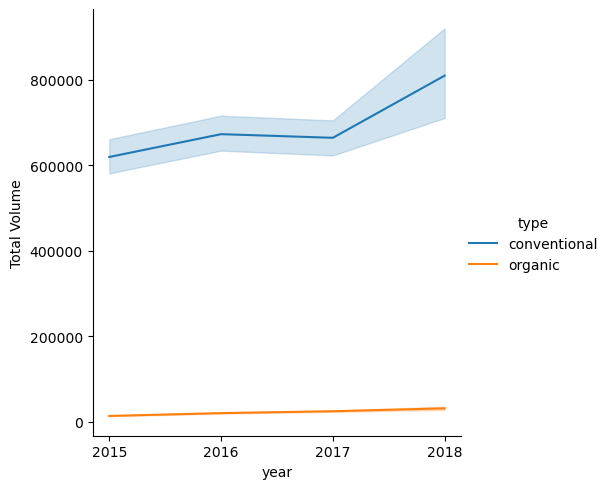

In [11]:
# Line chart example - the number of totol volumes sold by year by avocado type. Note that we use the Seaborn library here. 
sns.relplot(data=data, kind='line', x='year', y='Total Volume', hue='type')

# sns.relplot(data=data, kind='line', x='year', y='Total Volume', hue='type')
# # ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
# # plt.show()
# plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))

c:\Users\ftstc\anaconda3\envs\lis\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


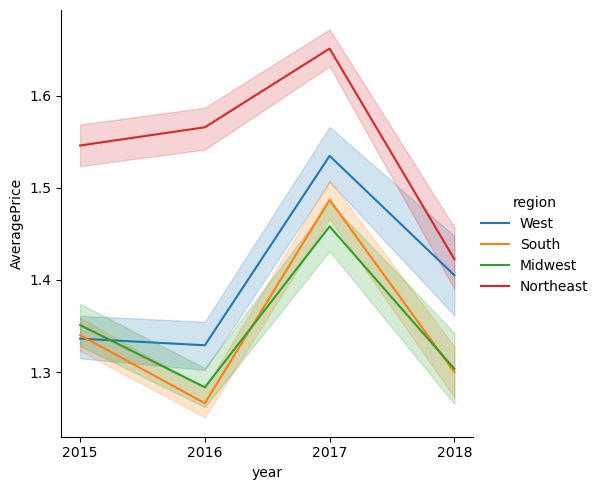

In [12]:
# Line chart question: Please create a line chart that shows the averge price by year by region 
# Solution: 
sns.relplot(data = data, kind = 'line', x = 'year', y = 'AveragePrice', hue = 'region')

# 2.2 Bar Chart

<Axes: xlabel='year'>

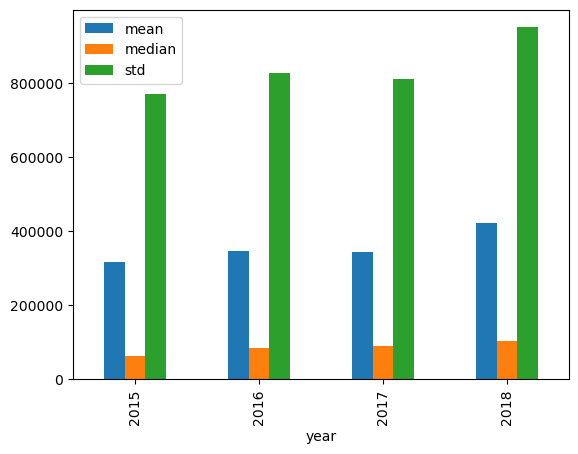

In [13]:
#Bar chart example 1: Create a bar plot that shows the mean, median, and standard deviation of the Total Volume column by year
data1=data.groupby('year')['Total Volume'].agg(['mean','median','std'])
data1
data1.plot.bar()

c:\Users\ftstc\anaconda3\envs\lis\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


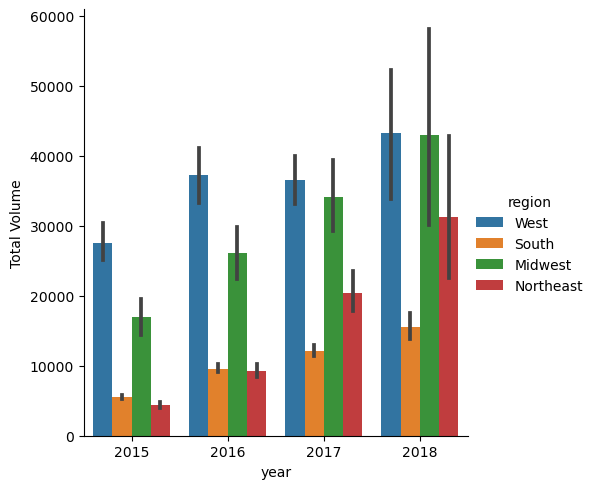

In [14]:
#Bar chart example 2: Create a barchart using the total volume of organic avocadoes sold, grouping by region and year. Use region as the color hue, and year as the x-axis
sns.catplot(data=data.query('type in ("organic")'),
            kind='bar', x='year', y='Total Volume', hue='region')

c:\Users\ftstc\anaconda3\envs\lis\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


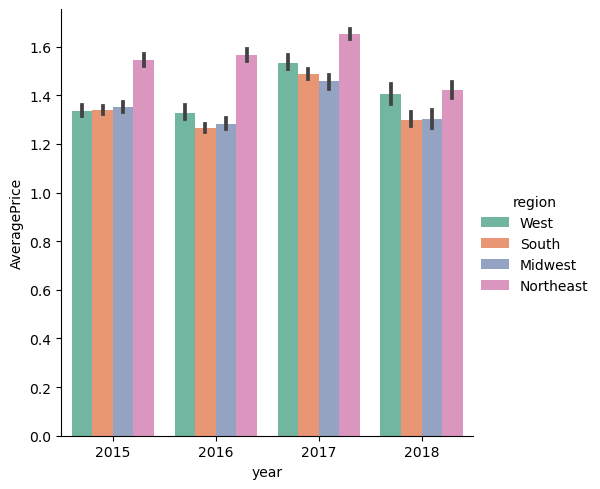

In [15]:
# Bar chart question: Create a grouped bar chart showing the Average Price of avocadoes sold, grouping by region and year. 
# Use region as the color hue. Use color palette Set2. 
# More info on color palette: https://seaborn.pydata.org/tutorial/color_palettes.html
# Solutions: 
# data2 = data.groupby('year', 'region')['AveragePrice']
sns.catplot(data = data, kind = 'bar', x = 'year', y = 'AveragePrice', hue = 'region', palette = sns.color_palette("Set2"))

# 2.3 Showing distribution using histograms or boxplots

<Axes: xlabel='AveragePrice', ylabel='Count'>

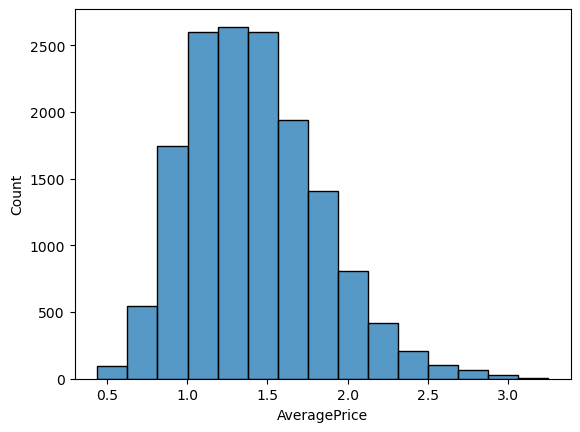

In [16]:
# Histogram example: show the distribution of average price using 15 bins. 
data_hist = data['AveragePrice']
sns.histplot(data_hist,bins=15)

<Axes: xlabel='year', ylabel='AveragePrice'>

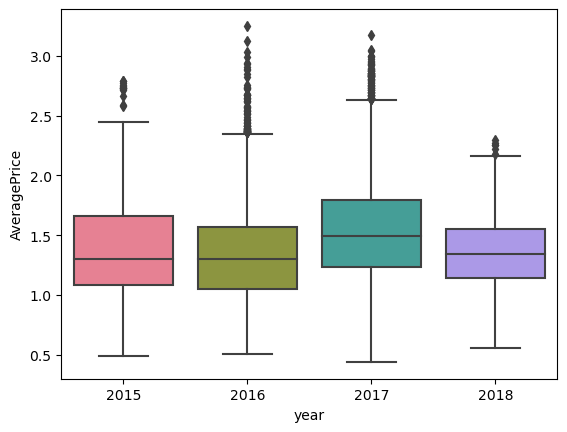

In [17]:
# Boxplot example: 
# create grouped boxplot: show distribution of average price by year
# use this to plt.style.use("seaborn-white") set the basic style of visualizations
sns.boxplot(x = data['year'], y = data['AveragePrice'], palette='husl')

<Axes: xlabel='year', ylabel='AveragePrice'>

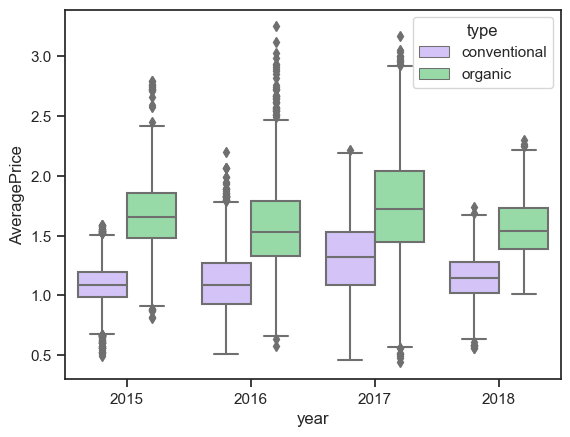

In [18]:
# Boxplot Question (You are required to pick one from Boxplot or histogram): create grouped boxplot 
# to show the distribution of average price by year and by type of avocado (for color); 
# You can choose any color palette; You should see 8 boxes
# Boxplot solution:
sns.set_theme(style = "ticks", palette = "pastel")
sns.boxplot(data = data, x = 'year', y = 'AveragePrice', hue = 'type', palette = ['m', 'g'])

<Axes: xlabel='AveragePrice', ylabel='Count'>

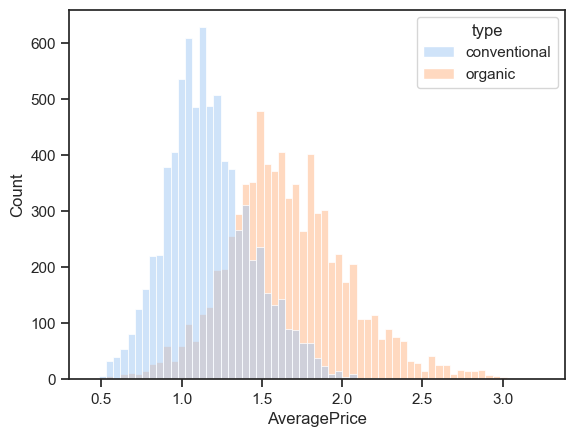

In [19]:
# Histogram question (You are required to pick one from Boxplot or histogram): create a histogram 
# to show the average price distribution of different avocado types
# Histogram solution -
sns.histplot(data = data, x = 'AveragePrice', hue = 'type')

# Step 2.4 Scatterplot

c:\Users\ftstc\anaconda3\envs\lis\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


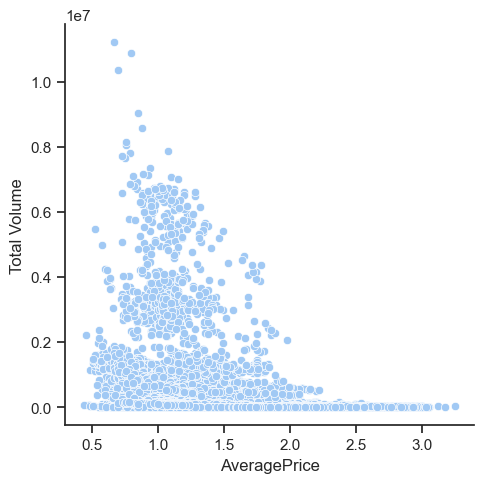

In [20]:
# Scatterplot example 1: create a scatterplot for total volume and average price using a generic method in seaborn. 
# More info: https://seaborn.pydata.org/generated/seaborn.relplot.html 
sns.relplot(data=data, kind='scatter', x='AveragePrice', y='Total Volume')

c:\Users\ftstc\anaconda3\envs\lis\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


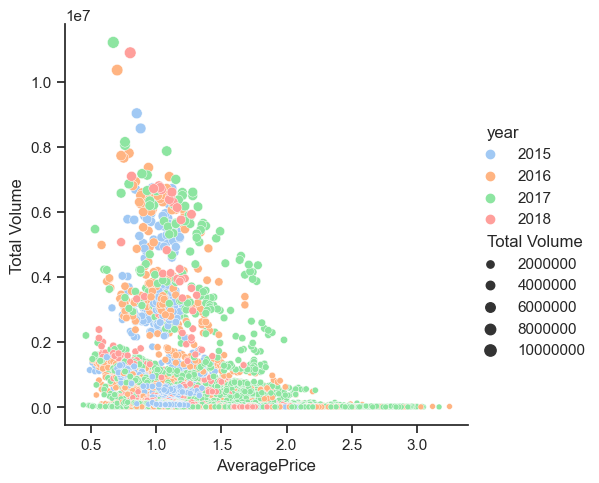

In [21]:
#Scatterplot example 2: Create the same plot but with the hue parameter set to year 
# and the dots for the total volume with their sizes proporitional to its value 
sns.relplot(data=data, kind='scatter', x='AveragePrice', y='Total Volume', hue='year',
           size='Total Volume')

c:\Users\ftstc\anaconda3\envs\lis\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


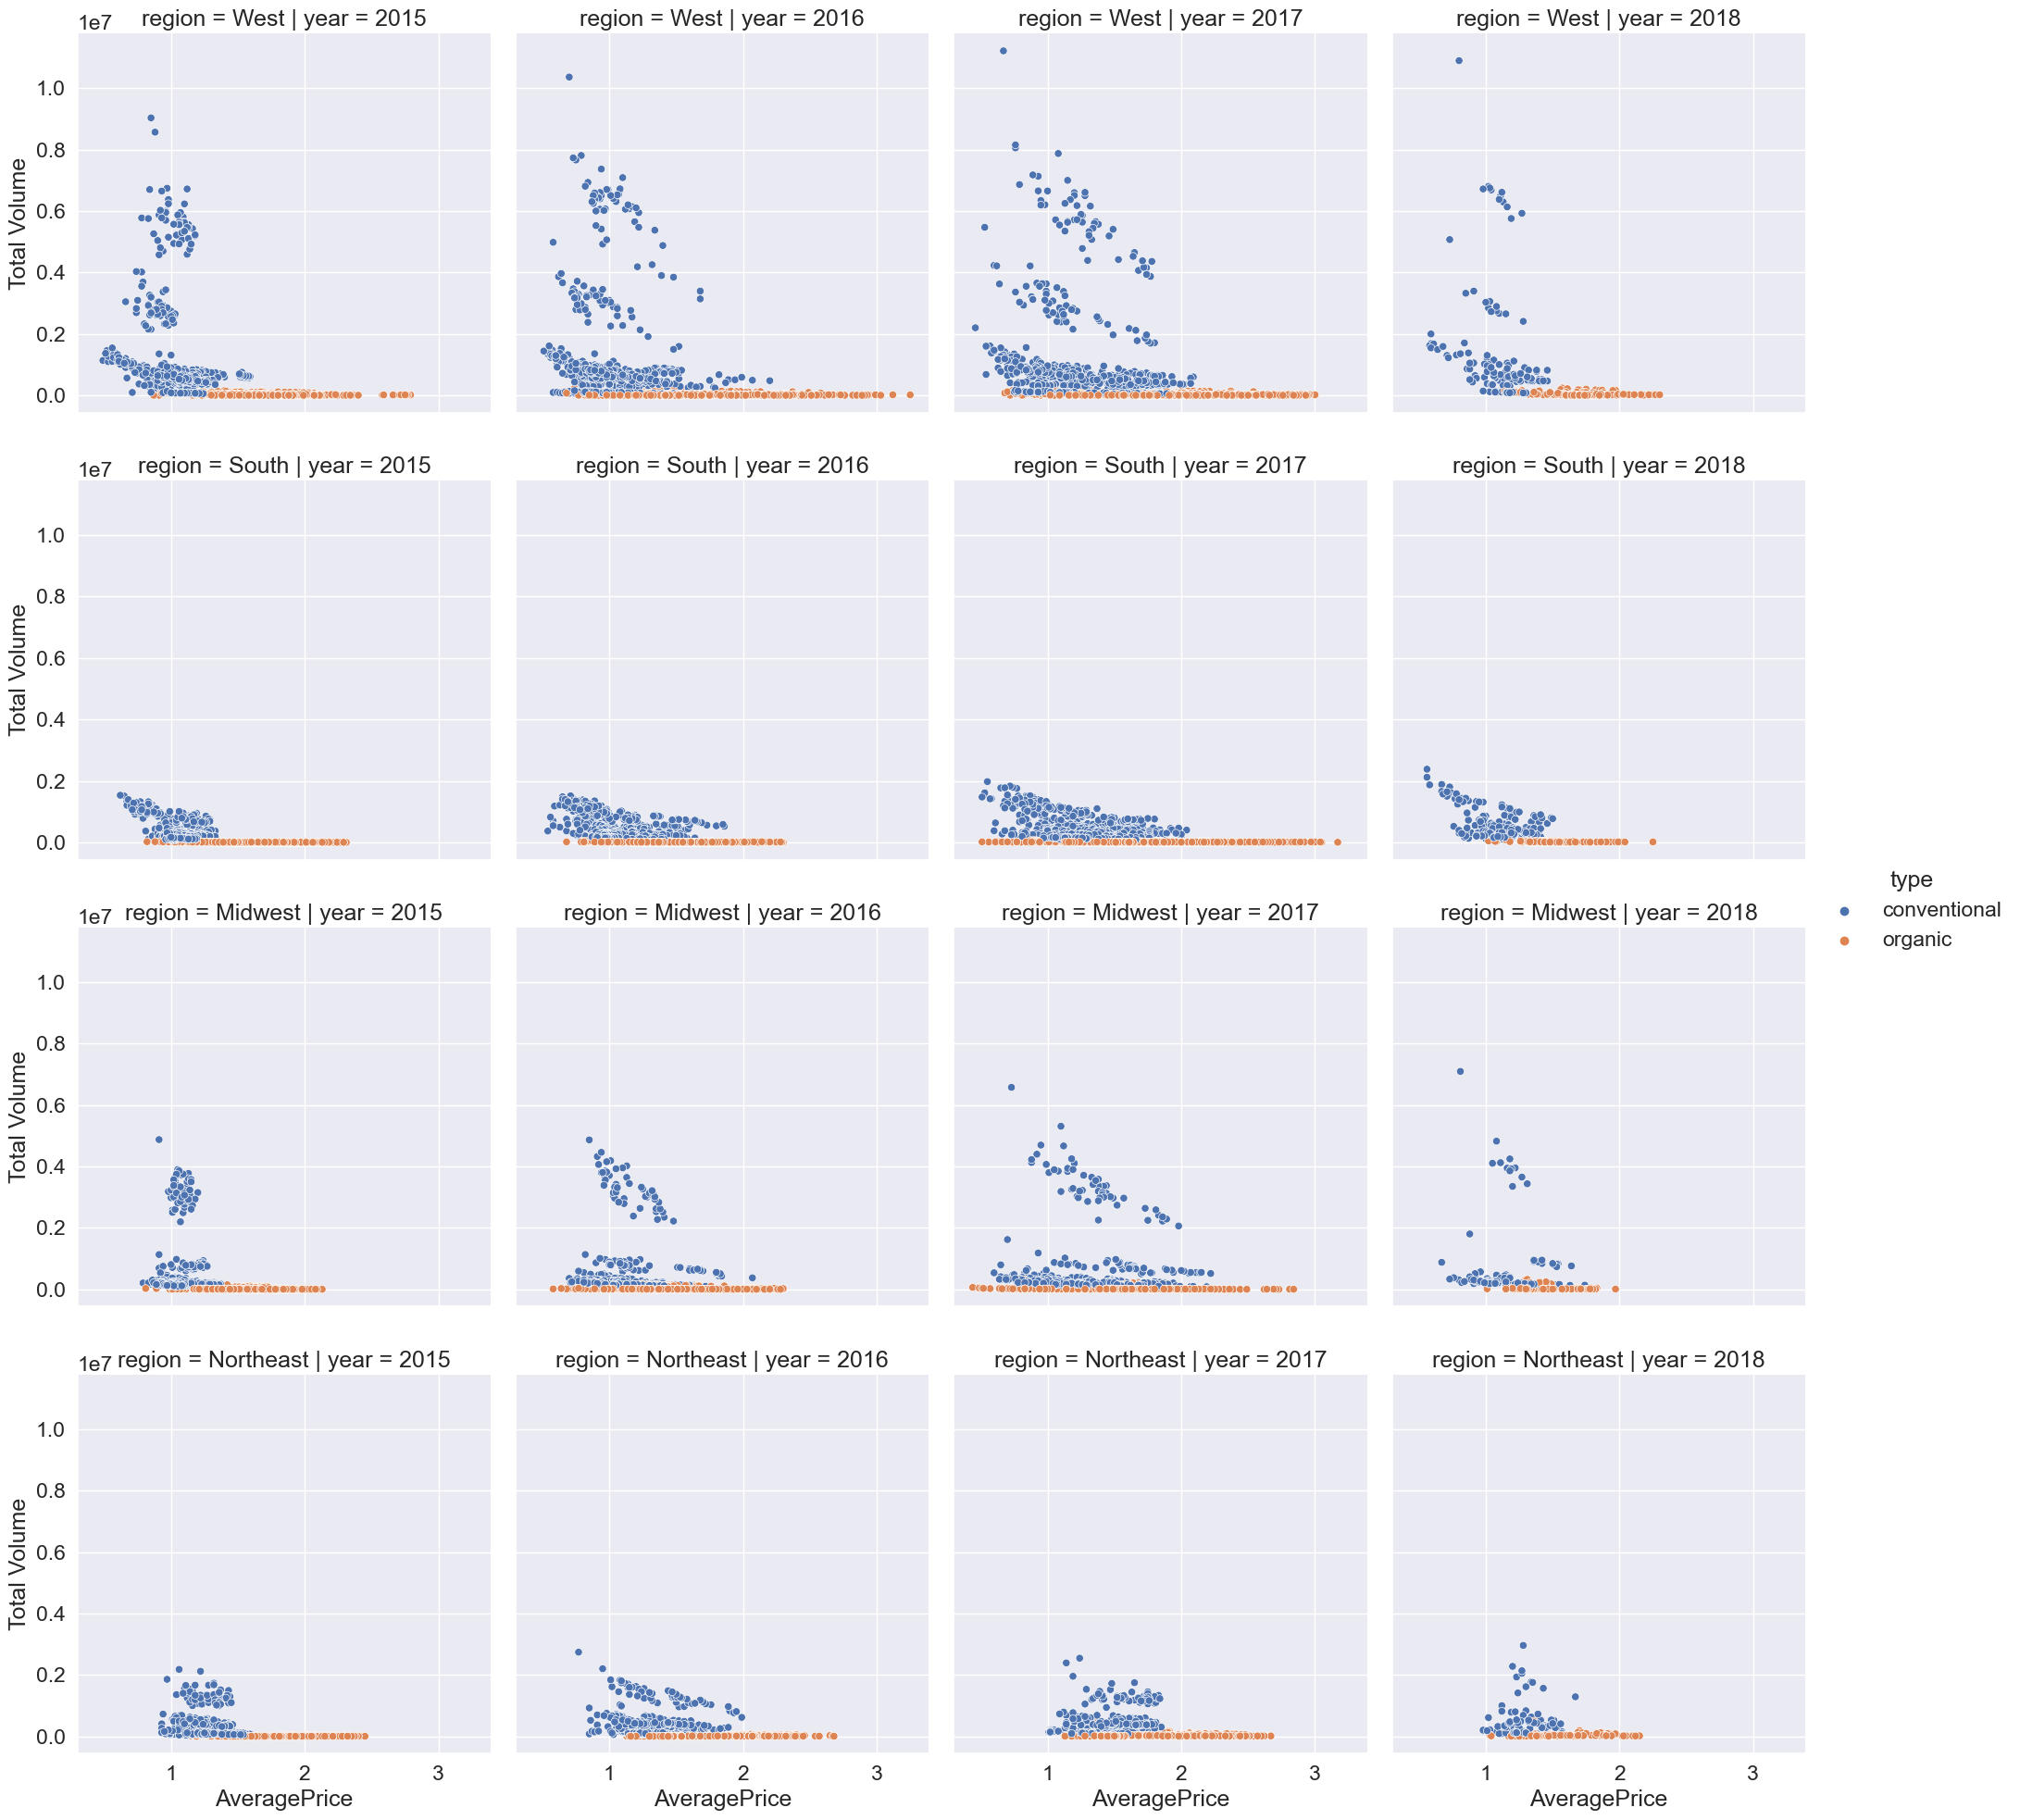

In [25]:
#Scatterplot question: create a 4*4 scatterplot showing the relationship between average price and total volume 
# by year and region; each dot is color coded by avocado type
# Hints: you will use hue, col and row parameters for relplot function. 
# Solutions
sns.set(font_scale=1.5)
sns.relplot(data = data, kind = 'scatter', x = 'AveragePrice', y = 'Total Volume', row = 'region', col = 'year', hue = 'type')
# plt.xlabel('AveragePrice', fontdict={'size': 15})
# plt.ylabel('Total Volume', fontdict={'size': 15})

# Step 2.5 Treemap

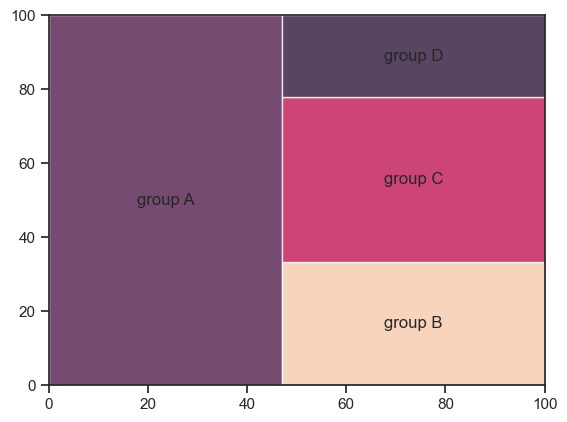

In [ ]:
# Treemap example: create a treemap with fake data
# Create a data frame with fake data
df = pd.DataFrame({'nb_people':[8,3,4,2], 'group':["group A", "group B", "group C", "group D"] })
# plot it
squarify.plot(sizes=df['nb_people'], label=df['group'], alpha=.8 )
#plt.axis('off')
plt.show()

['2015', '2016', '2017', '2018']


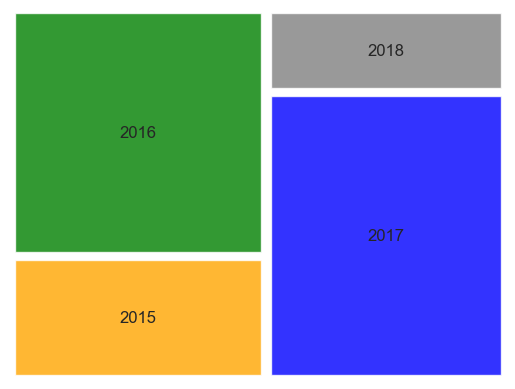

In [ ]:
# Treemap question: Creat a treemap showing the composition of total avocado sales by year. 
# More info on colors: https://www.geeksforgeeks.org/treemaps-in-python-using-squarify/
# https://www.geeksforgeeks.org/treemaps-in-python-using-squarify/
# group the nmber of bags sold by year
n = data.groupby('year')[['Total Bags']].sum()
# extract data and labels as lists
a = data.groupby('year')[['Total Bags']].sum().index.get_level_values(0).tolist()
# print(n)
# print(n.values)
group_names = list(data.groupby('year').groups.keys())
group_names02 = list(data.year.unique())
# print(group_names02)
# print(a)
squarify.plot(sizes=n.values, label=a, alpha=.8,color=["orange","green","blue", "grey"],pad=True)
plt.axis('off')
plt.show()

<Axes: >

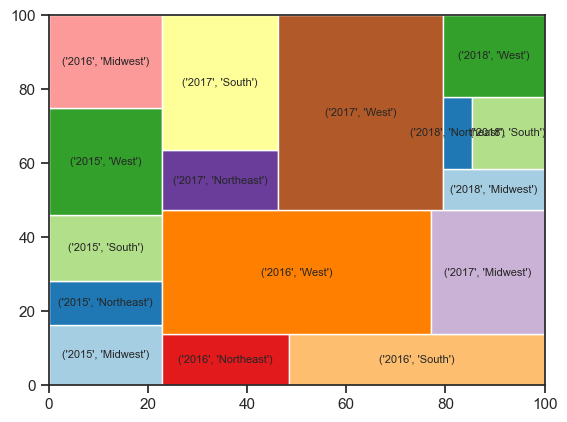

In [ ]:
# Treemap question: Creat a treemap showing the composition of avocado sales by year by region
# Solutions:
# hint 1: you will need to group the nmber of bags sold by year and region
num = data.groupby(['year', 'region'])['Total Bags'].sum()
# print(num)
label = list(data.groupby(['year', 'region']).groups.keys())
# print(label)
squarify.plot(sizes = num, label = label, color = sns.color_palette('Paired'), text_kwargs={'fontsize':8, 'wrap':True})

# Optional - additional exploration

In [ ]:
# Filter the data so it contains just the rows for 2015, for the conventional type, and for the region named Northeast. 
# Store just the Date, Total Bags, and Small Bags columns in a new DataFrame.
data_reduced = data.query('year == "2015" and region == "Northeast" and type == "conventional"')[['Date','Total Bags','Small Bags']]
data_reduced
# data

,Date,Total Bags,Small Bags
5746,2015-12-27,86012.86,85913.60
5747,2015-12-20,88901.80,88768.47
5748,2015-12-13,89722.96,89523.38
5749,2015-12-06,75889.78,75666.22
5750,2015-11-29,74125.62,73864.52
...,...,...,...
12501,2015-02-01,31870.24,20561.48
12502,2015-01-25,24416.80,17599.77
12503,2015-01-18,19359.33,12321.55
12504,2015-01-11,18068.15,12165.94


In [ ]:
# Melt the data in the Total Bags and Small Bags columns, but not the values in the Date column. 
# Name the column that contains the type of bag Bags, and name the column that contains the number of bags Count. 
# Then, display the resulting DataFrame.
data_melted = pd.melt(data_reduced, id_vars='Date', value_vars=['Total Bags','Small Bags'],
                     var_name='Bags', value_name='Count')
data_melted

,Date,Bags,Count
0,2015-12-27,Total Bags,86012.86
1,2015-12-20,Total Bags,88901.80
2,2015-12-13,Total Bags,89722.96
3,2015-12-06,Total Bags,75889.78
4,2015-11-29,Total Bags,74125.62
...,...,...,...
931,2015-02-01,Small Bags,20561.48
932,2015-01-25,Small Bags,17599.77
933,2015-01-18,Small Bags,12321.55
934,2015-01-11,Small Bags,12165.94


C:\Users\ftstc\anaconda3\envs\lis\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


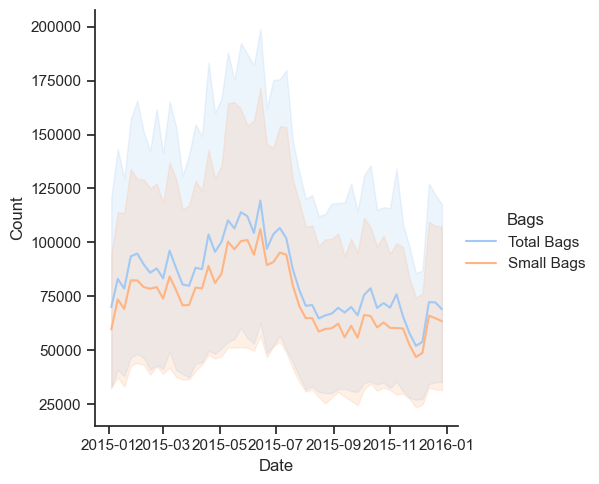

In [ ]:
## Plot the melted data with Seaborn in a line plot, using the hue parameter to distinguish between the bag types.
sns.relplot(data=data_melted, kind='line', x='Date', y='Count', hue='Bags')

In [ ]:
#Bin the data in the Total Volume column into four quantiles labeled ‘poor’, ‘modest’, ‘good’, and ‘excellent’, and store the bin labels in a new column.
data['Sales Volume'] = pd.qcut(data['Total Volume'], q=4, labels=['poor','modest','good','excellent'])
data

,ID,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,city,state,region,Sales Volume
0,0,2015-12-27,0.49,1137707.43,738314.80,286858.37,11642.46,100891.80,70749.02,30142.78,0.0,conventional,2015,PhoenixTucson,AZ,West,excellent
1,1,2015-12-20,0.53,1097224.25,785254.94,204147.30,10346.68,97475.33,72169.92,25305.41,0.0,conventional,2015,PhoenixTucson,AZ,West,excellent
2,2,2015-12-13,0.66,907470.09,546182.56,241774.69,9429.99,110082.85,92028.11,18054.74,0.0,conventional,2015,PhoenixTucson,AZ,West,excellent
3,3,2015-12-06,0.56,1105500.34,760680.02,271207.14,13354.80,60258.38,60255.64,2.74,0.0,conventional,2015,PhoenixTucson,AZ,West,excellent
4,4,2015-11-29,0.75,724915.60,449043.34,208439.29,9770.44,57662.53,57662.53,0.00,0.0,conventional,2015,PhoenixTucson,AZ,West,excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15205,47,2015-02-01,0.97,135656.36,35897.25,84741.31,2704.69,12313.11,12276.59,36.52,0.0,conventional,2015,Spokane,WA,West,good
15206,48,2015-01-25,1.21,64116.71,23843.63,29590.60,2672.12,8010.36,8010.36,0.00,0.0,conventional,2015,Spokane,WA,West,modest
15207,49,2015-01-18,1.18,69600.14,28457.99,29719.57,2933.27,8489.31,7986.02,503.29,0.0,conventional,2015,Spokane,WA,West,modest
15208,50,2015-01-11,1.07,70697.07,21973.57,35996.70,4131.75,8595.05,6899.10,1695.95,0.0,conventional,2015,Spokane,WA,West,modest


C:\Users\ftstc\anaconda3\envs\lis\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


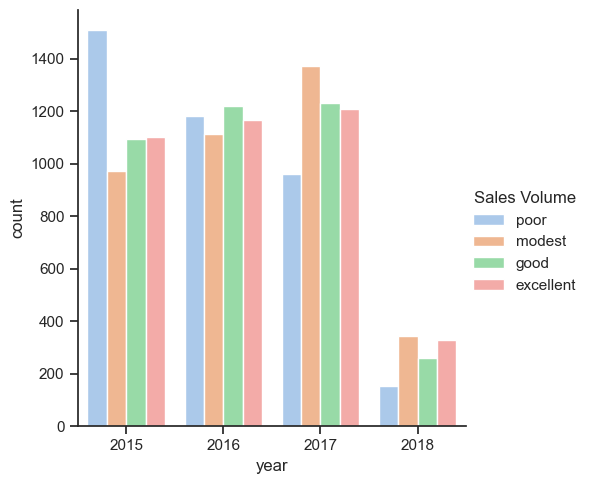

In [ ]:
# Plot the binned data by year using a Seaborn count plot.
sns.catplot(data=data, kind='count', x='year', hue='Sales Volume')

# The end of the assignment